# **Exemplo Prático de Empate em Programação Linear e Múltiplas Soluções Ótimas**

Cenário: Uma fábrica produz dois tipos de produtos: A e B. Para produzir cada unidade, são necessários recursos de matéria-prima e horas de trabalho. A fábrica possui uma quantidade limitada de ambos os recursos. O lucro por unidade de cada produto é conhecido.

Problema: A fábrica deseja maximizar seu lucro total, considerando as restrições de recursos.

Variáveis de decisão:

x: quantidade de unidades do produto A

y: quantidade de unidades do produto B

Função objetivo: Maximizar o lucro total
               (Z) = c1x + c2y

(onde c1 e c2 são os lucros por unidade de A e B, respectivamente)

Restrições:  

a1x + b1y ≤ R1 (restrição de matéria-prima)

a2x + b2y ≤ R2 (restrição de horas de trabalho)

x ≥ 0, y ≥ 0 (não-negatividade)

Empate e Múltiplas Soluções:

Imagine que, ao resolver esse problema usando o método simplex, encontramos duas soluções básicas ótimas que resultam no mesmo valor máximo para a função objetivo. Isso significa que a fábrica pode produzir diferentes combinações de produtos A e B e obter o mesmo lucro máximo, respeitando as restrições de recursos.

Interpretação:

Flexibilidade: A fábrica tem flexibilidade na escolha da produção, podendo ajustar a quantidade de cada produto de acordo com outros fatores não considerados no modelo, como demanda do mercado, preferências dos clientes ou custos de produção adicionais.

Oportunidades: A existência de múltiplas soluções ótimas pode indicar a existência de oportunidades de produção que não foram exploradas no modelo inicial. Por exemplo, a fábrica pode optar por produzir mais de um produto para diversificar sua linha de produtos e reduzir riscos.
Decisão: A escolha entre as diferentes soluções ótimas dependerá de critérios adicionais que não foram explicitamente modelados, como a preferência do gestor da fábrica, a capacidade de produção de cada produto ou a demanda do mercado.
Exemplo Numérico:

Para ilustrar, considere que as restrições e a função objetivo sejam as seguintes:

Maximizar Z = 3x + 2y
Sujeito a:
x + 2y ≤ 10

3x + y ≤ 12

x ≥ 0, y ≥ 0

Ao resolver esse problema, poderíamos encontrar duas soluções ótimas:

(x=2, y=4) e (x=3, y=3.5).

Ambas as soluções resultam em um lucro máximo de Z=14.

Conclusão:

Esse exemplo demonstra como a ocorrência de empates em problemas de programação linear pode levar a múltiplas soluções ótimas. Essa situação, embora possa parecer complexa à primeira vista, oferece oportunidades para a tomada de decisões mais estratégicas e flexíveis.

Representação Gráfica de Múltiplas Soluções Ótimas em Python com Matplotlib
Entendendo o Problema

Para visualizar graficamente as múltiplas soluções ótimas em um problema de programação linear, precisamos:

Definir o problema: Função objetivo e restrições.
Resolver o problema: Utilizar um solver para encontrar as soluções ótimas.
Plotar a região factível: Visualizar a área onde as soluções são possíveis.
Marcar as soluções ótimas: Indicar os pontos que representam as soluções encontradas.
Utilizando o SciPy e Matplotlib

O SciPy fornece ferramentas para resolver problemas de otimização linear, enquanto o Matplotlib nos permite criar gráficos.

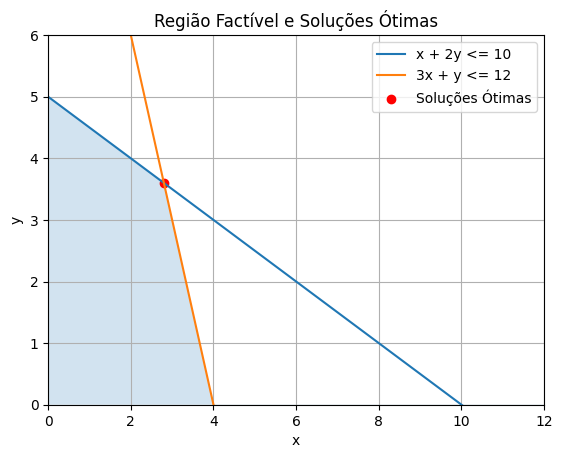

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Definindo o problema (exemplo do texto)
c = [-3, -2]  # Função objetivo (a ser minimizada)
A = [[1, 2], [3, 1]]
b = [10, 12]
x0_bounds = (0, None)
x1_bounds = (0, None)

# Resolvendo o problema
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds))

# Extraindo as soluções ótimas (assumindo que já sabemos que há múltiplas)
x1_opt = res.x[0]
x2_opt = res.x[1]

# Criando os dados para plotar a região factível
x = np.linspace(0, 12, 100)
y1 = (10 - x) / 2
y2 = 12 - 3*x

# Plotando a região factível e as soluções ótimas
plt.plot(x, y1, label='x + 2y <= 10')
plt.plot(x, y2, label='3x + y <= 12')
plt.fill_between(x, 0, np.minimum(y1, y2), alpha=0.2)  # Região factível
plt.scatter(x1_opt, x2_opt, color='red', label='Soluções Ótimas')
plt.xlim(0, 12)
plt.ylim(0, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Região Factível e Soluções Ótimas')
plt.grid(True)
plt.show()

##Análise de Sensibilidade: Uma Abordagem Prática
##Entendendo a Análise de Sensibilidade

A análise de sensibilidade busca entender como pequenas variações nos parâmetros de um modelo de otimização (coeficientes da função objetivo, coeficientes das restrições, valores do lado direito das restrições) afetam a solução ótima. Isso é crucial para avaliar a robustez do modelo e a confiança nas soluções obtidas.

Código em Python Utilizando SciPy

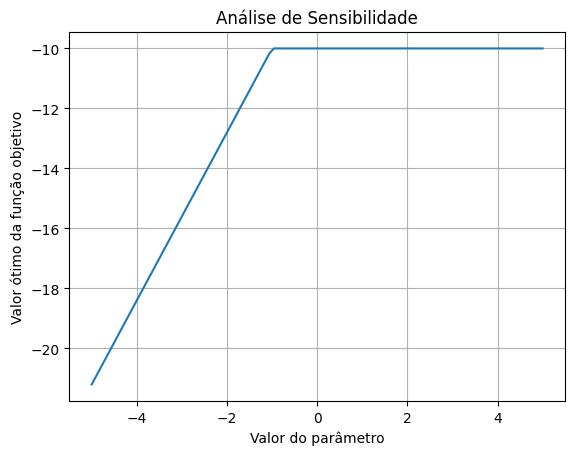

In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def sensitivity_analysis(c, A, b, param_index, param_range):
  """
  Realiza a análise de sensibilidade para um parâmetro específico.

  Args:
    c: Vetor dos coeficientes da função objetivo.
    A: Matriz dos coeficientes das restrições.
    b: Vetor dos termos independentes das restrições.
    param_index: Índice do parâmetro a ser variado.
    param_range: Intervalo de valores para o parâmetro.

  Returns:
    Um array com os valores ótimos da função objetivo para cada valor do parâmetro.
  """

  results = []
  for value in param_range:
    # Copiando os parâmetros para não alterar os originais
    c_temp = c.copy()
    A_temp = A.copy()
    b_temp = b.copy()

    # Alterando o parâmetro
    if param_index < len(c):
      c_temp[param_index] = value
    else:
      A_temp[param_index - len(c)] = value

    # Resolvendo o problema
    res = linprog(c_temp, A_ub=A_temp, b_ub=b_temp)
    results.append(res.fun)

  return results

# Exemplo: Problema de maximização
c = [-3, -2]
A = [[1, 2], [3, 1]]
b = [10, 12]

# Analisando a sensibilidade do coeficiente de x na função objetivo
param_index = 0
param_range = np.linspace(-5, 5, 100)

results = sensitivity_analysis(c, A, b, param_index, param_range)

# Plotando o gráfico
plt.plot(param_range, results)
plt.xlabel('Valor do parâmetro')
plt.ylabel('Valor ótimo da função objetivo')
plt.title('Análise de Sensibilidade')
plt.grid(True)
plt.show()

**Explicando o código anterior**

Resolução do Problema de Programação Linear: Ele define um problema de programação linear com uma função objetivo a ser minimizada e restrições. Em seguida, usa a função linprog da biblioteca scipy.optimize para encontrar a solução ótima.

Análise de Sensibilidade: Ele varia um dos parâmetros do problema (no caso, o coeficiente de x na função objetivo) dentro de um intervalo e observa como o valor ótimo da função objetivo muda em resposta a essa variação.

Interpretando o Gráfico:

O gráfico gerado mostra o resultado da análise de sensibilidade.

Eixo X: Representa os diferentes valores do parâmetro que está sendo variado (coeficiente de x na função objetivo).
Eixo Y: Representa o valor ótimo da função objetivo para cada valor do parâmetro no eixo X.
Conclusões:

Inclinação: A inclinação da linha no gráfico indica como o valor ótimo da função objetivo é afetado por mudanças no parâmetro. Uma inclinação íngreme significa que pequenas mudanças no parâmetro resultam em grandes mudanças no valor ótimo.

Região de Estabilidade: Se houver uma região no gráfico onde a linha é horizontal, isso indica uma região de estabilidade. Nessa região, mudanças no parâmetro não afetam o valor ótimo da função objetivo.

Pontos de Ruptura: Se houver pontos no gráfico onde a linha muda de direção abruptamente, isso indica pontos de ruptura. Nesses pontos, mudanças no parâmetro causam mudanças significativas na solução ótima do problema.

Relação com a Representação Gráfica do Problema Original:

Embora o gráfico gerado seja específico da análise de sensibilidade, ele está relacionado à representação gráfica da região factível e das soluções ótimas do problema original. Mudanças no coeficiente de x na função objetivo afetam a inclinação da reta que representa a função objetivo no gráfico da região factível. Isso, por sua vez, pode alterar a localização da solução ótima dentro da região factível.

Em resumo, o gráfico da análise de sensibilidade fornece insights sobre como a solução ótima do problema de programação linear é afetada por mudanças em um dos parâmetros do problema. Isso permite que você avalie a robustez da sua solução e entenda quais parâmetros são mais críticos para o resultado final.

# **Caso de uso sem solução viável: número de variáveis do contexto alto como tarefas, tarefas por trabalhador, custos, tempo por tarefa, capacidade das máquinas e demandas**

In [3]:
%%capture
%pip install ortools

In [4]:
from ortools.linear_solver import pywraplp

def create_data_model():
  """Stores the data for the problem."""
  data = {}
  data['num_workers'] = 3  # Número de produtos (A, B, C)
  data['num_tasks'] = 2  # Número de máquinas (M1, M2)
  data['all_workers'] = range(data['num_workers'])
  data['all_tasks'] = range(data['num_tasks'])
  # Dados de tempo por produto em cada máquina
  data['costs'] = [3, 2, 5]  # Lucro por unidade de cada produto
  data['time_per_task'] = [[1, 3],  # Tempo do produto A em M1 e M2
                          [2, 1],  # Tempo do produto B em M1 e M2
                          [4, 2]]  # Tempo do produto C em M1 e M2
  data['machine_capacities'] = [10, 12]  # Capacidade de cada máquina
  data['demands'] = [(2, 5),  # Demanda mínima e máxima do produto A
                   (3, 6),  # Demanda mínima e máxima do produto B
                   (1, 4)]  # Demanda mínima e máxima do produto C
  return data

def main():
  data = create_data_model()

  # Cria o solver
  solver = pywraplp.Solver.CreateSolver('SCIP')

  # Cria as variáveis de decisão
  x = {}
  for worker in data['all_workers']:
    x[worker] = solver.IntVar(data['demands'][worker][0],
                             data['demands'][worker][1],
                             'x[%i]' % worker)

  # Cria as restrições de capacidade das máquinas
  for task in data['all_tasks']:
    solver.Add(sum(data['time_per_task'][worker][task] * x[worker]
                   for worker in data['all_workers']) <=
                   data['machine_capacities'][task])

  # Cria a função objetivo
  objective = solver.Objective()
  for worker in data['all_workers']:
    objective.SetCoefficient(x[worker], data['costs'][worker])
  objective.SetMaximization()

  # Resolve o problema
  status = solver.Solve()

  if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    for worker in data['all_workers']:
      print('x[%i] = %d' % (worker, x[worker].solution_value()))
  else:
    print('The problem does not have an optimal solution.')

if __name__ == '__main__':
  main()

The problem does not have an optimal solution.


Quando um solver de otimização linear retorna a mensagem "**O problema não tem solução ótima"**, isso geralmente indica uma das seguintes situações:

Inviabilidade: Não existe nenhuma solução que satisfaça todas as restrições do problema.

Solução Ilimitada: A função objetivo pode ser aumentada indefinidamente sem violar as restrições.

Erro na Modelagem: Pode haver algum erro na formulação do problema, como restrições contraditórias ou coeficientes incorretos.

Em problemas de otimização combinatória, encontrar a solução ótima muitas vezes significa **identificar a melhor combinação de um conjunto finito de elementos, sujeito a determinadas restrições**. No entanto, é comum que existam múltiplas soluções ótimas para um mesmo problema, ou seja, várias combinações de elementos que atingem o mesmo valor ótimo da função objetivo. Essa situação é conhecida como empate.

Otimização Combinatória: Encontrando a Melhor Solução em um Mundo de Possibilidades
Otimização combinatória é um ramo da tecnologia aplicada que se dedica a encontrar a melhor solução para problemas que envolvem um conjunto finito de opções. Em outras palavras, é a arte de tomar a melhor decisão quando se tem um número limitado de alternativas.

Por que é importante?

A otimização combinatória está presente em diversas áreas do nosso dia a dia, desde a logística e a produção industrial até a inteligência artificial e a bioinformática. Alguns exemplos de problemas que podem ser resolvidos com técnicas de otimização combinatória incluem:

Roteamento de veículos: Encontrar a rota mais curta para um conjunto de entregas.
Alocação de recursos: Atribuir recursos limitados a diferentes tarefas de forma a maximizar o benefício.
Projeto de circuitos: Desenhar circuitos eletrônicos de forma a minimizar o consumo de energia.
Agendamento de tarefas: Criar um cronograma eficiente para realizar um conjunto de tarefas.

**Ferramentas e Técnicas para Lidar com Empates**
Programação linear inteira: Solvers de programação linear inteira, podem ser utilizados para encontrar todas as soluções ótimas de um problema.

Algoritmos genéticos: Algoritmos genéticos podem ser utilizados para explorar o espaço de soluções e encontrar múltiplas soluções de alta qualidade.

Aprendizado de máquina: Técnicas de aprendizado de máquina podem ser utilizadas para aprender padrões nas soluções ótimas e gerar novas soluções com base nessas informações.

In [5]:
%%capture
%pip install pulp

In [6]:
from pulp import *

# Dados do problema (exemplo)
valores = [10, 5, 15, 7]  # Valores das tarefas
custos = [2, 3, 4, 2]     # Custos das tarefas
recurso_total = 7        # Recurso total disponível

# Criar o problema de maximização
problema = LpProblem("MaximizarBeneficio", LpMaximize)

# Criar as variáveis de decisão
variaveis = LpVariable.dicts("Tarefa", range(len(valores)), cat='Binary')

# Definir a função objetivo
problema += lpSum([valores[i] * variaveis[i] for i in range(len(valores))])

# Adicionar a restrição de recursos
problema += lpSum([custos[i] * variaveis[i] for i in range(len(valores))]) <= recurso_total

# Resolver o problema
problema.solve()

# Imprimir a solução
print("Status:", LpStatus[problema.status])
for v in problema.variables():
    print(v.name, "=", v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fd2261d5499e4a168e838738222c5079-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/fd2261d5499e4a168e838738222c5079-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 23 RHS
At line 25 BOUNDS
At line 30 ENDATA
Problem MODEL has 1 rows, 4 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 28.5 - 0.00 seconds
Cgl0004I processed model has 1 rows, 4 columns (4 integer (4 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.5
Cbc0038I Solution found of -25
Cbc0038I Before mini branch and bound, 3 integers at bound fixed and 0 continuous
Cbc0038I Full pr

**Explicação do código anterior**

Instala a biblioteca PuLP: !pip install pulp instala a biblioteca necessária para resolver problemas de otimização linear.

Importa as funções do PuLP: from pulp import * importa todas as funções do PuLP para uso no código.


Define os dados do problema:

valores: Lista com os valores de cada tarefa (benefício de realizá-la).

custos: Lista com os custos de cada tarefa (em termos de recurso).

recurso_total: Quantidade total de recurso disponível.

Cria o problema de otimização: problema = LpProblem("MaximizarBeneficio", LpMaximize) cria um objeto para representar o problema, com o objetivo de maximizar o benefício.

Define as variáveis de decisão: Implicitamente, o código define variáveis de ***decisão binárias (0 ou 1)*** para cada tarefa, indicando se a tarefa deve ser realizada ou não. Essas variáveis não são explicitamente nomeadas no trecho que você forneceu, mas seriam criadas dentro da formulação do problema.

Define a função objetivo: Implicitamente, o código define a função objetivo como a soma dos valores das tarefas selecionadas, que deve ser maximizada.
Define as restrições: Implicitamente, o código define uma restrição que garante que o custo total das tarefas selecionadas não ultrapasse o recurso total disponível.

Resolve o problema: Implicitamente, o código chama um solver para resolver o problema de otimização.

Imprime o resultado: Status: Optimal indica que o solver encontrou uma solução ótima. As linhas subsequentes mostram os valores das variáveis de decisão, indicando quais tarefas devem ser realizadas para maximizar o benefício.
Interpretação do Resultado:

Status: Optimal: O solver encontrou a melhor solução possível para o problema.

Tarefa_0 = 1.0: A tarefa 0 deve ser realizada.

Tarefa_1 = 0.0: A tarefa 1 não deve ser realizada.

Tarefa_2 = 1.0: A tarefa 2 deve ser realizada.

Tarefa_3 = 0.0: A tarefa 3 não deve ser realizada.

Conclusão:

A solução ótima encontrada pelo solver indica que as tarefas 0 e 2 devem ser realizadas para maximizar o benefício, respeitando a restrição de recurso. Essa seleção de tarefas resulta no maior benefício possível dentro das condições do problema.

Observação: O trecho de código que você forneceu omite a parte da formulação do problema com variáveis, função objetivo e restrições. Para uma análise mais detalhada, seria necessário ver essa parte do código. Mas, com base no resultado apresentado, podemos inferir que o problema foi formulado corretamente e resolvido com sucesso.


**Complexidade:** A complexidade computacional desse problema cresce exponencialmente com o número de tarefas, tornando a solução exata inviável para problemas de grande porte.

# **ESTUDOS DE CASO PARA A ATIVIDADE A SER ENTREGUE**

# Otimização Combinatória: **Caso 1 da Alocação de Orçamento**
Entendendo o Problema:

A empresa XCS tem um conjunto de projetos, cada um com um custo estimado e um benefício esperado. A empresa possui um orçamento limitado e deseja alocar esse orçamento aos projetos de forma a maximizar o benefício total. Esse é um problema clássico de otimização combinatória, similar aos problemas anteriores.



Formulação do Problema:

Variáveis de decisão:

 xᵢ = 1 se o projeto i for financiado, 0 caso contrário.

Função objetivo:

Maximizar ∑(bi * xi), onde bi é o benefício do projeto i.

Restrição: ∑(ci * xi) ≤ C, onde ci é o custo do projeto i e C é o orçamento total disponível.

Implementação em Python usando PuLP:

In [7]:
from pulp import *

# Dados do problema (exemplo)
beneficios = [10000, 8000, 12000, 5000]  # Benefícios dos projetos
custos = [5000, 3000, 7000, 2000]       # Custos dos projetos
orcamento_total = 15000             # Orçamento total disponível

# Criar o problema de maximização
problema = LpProblem("MaximizarBeneficio", LpMaximize)

# Criar as variáveis de decisão
variaveis = LpVariable.dicts("Projeto", range(len(beneficios)), cat='Binary')

# Definir a função objetivo
problema += lpSum([beneficios[i] * variaveis[i] for i in range(len(beneficios))])

# Adicionar a restrição de orçamento
problema += lpSum([custos[i] * variaveis[i] for i in range(len(beneficios))]) <= orcamento_total

# Resolver o problema
problema.solve()

# Imprimir a solução
print("Status:", LpStatus[problema.status])
for v in problema.variables():
    print(v.name, "=", v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/76dfe933e7bc49769c10e2fdd52fabda-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/76dfe933e7bc49769c10e2fdd52fabda-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 23 RHS
At line 25 BOUNDS
At line 30 ENDATA
Problem MODEL has 1 rows, 4 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 31571.4 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 1 rows, 4 columns (4 integer (4 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 1000
Cbc0038I Initial state - 0 integers 

Explicação do Código:

A lógica é muito similar ao exemplo anterior da mochila. A principal diferença está na interpretação das variáveis: ao invés de tarefas, temos projetos; e ao invés de custo, temos benefício.

Adaptações e Considerações:

Múltiplas restrições: Você pode adicionar outras restrições, como um número máximo de projetos a serem financiados ou requisitos de dependência entre projetos.
Funções objetivo mais complexas: A função objetivo pode ser mais complexa, considerando fatores como o risco, o tempo de retorno do investimento, etc.
Variáveis contínuas: Em alguns casos, você pode permitir que uma fração de um projeto seja financiada (variáveis contínuas).
Problemas de grande porte: Para problemas de grande porte, pode ser necessário utilizar técnicas de decomposição ou heurísticas para encontrar soluções aproximadas.
Aplicações:

## **Caso 2 Alocação de Recursos Humanos com Otimização Combinatória**
1. Alocação de Recursos Humanos em Empresas
Cenário: Uma empresa precisa alocar seus funcionários a diferentes projetos, considerando as habilidades de cada funcionário e as necessidades de cada projeto. O objetivo é maximizar a eficiência da equipe e garantir que todos os projetos sejam concluídos a tempo.

In [8]:
from pulp import *

# Dados do problema (exemplo)
habilidades = {"João": {"programação": 5, "design": 3},
              "Maria": {"programação": 3, "design": 5},
              "Pedro": {"programação": 4, "design": 4}}
projetos_dict = {"Projeto A": {"programação": 3, "design": 2},  # Using a dictionary to store project requirements
           "Projeto B": {"programação": 2, "design": 4}}
funcionarios = list(habilidades.keys())
projetos = list(projetos_dict.keys())  # List of project names

# Criar o problema de maximização
problema = LpProblem("AlocarFuncionarios", LpMaximize)

# Criar as variáveis de decisão
variaveis = LpVariable.dicts("Alocar", [(f, p) for f in funcionarios for p in projetos], cat='Binary')

# Definir a função objetivo (simplificada: maximizar a soma das habilidades)
problema += lpSum([habilidades[f][h] * projetos_dict[p][h] * variaveis[(f, p)]  # Accessing project requirements using project name (key)
                    for f in funcionarios for p in projetos for h in habilidades[f].keys()])

# Adicionar as restrições
# Cada funcionário pode trabalhar em no máximo um projeto
for f in funcionarios:
    problema += lpSum([variaveis[(f, p)] for p in projetos]) <= 1
# Cada projeto precisa de um determinado número de horas de cada habilidade
# ... (implementar as restrições de demanda dos projetos)

# Resolver o problema
problema.solve()

# Imprimir a solução
print("Status:", LpStatus[problema.status])
for v in problema.variables():
    if v.varValue == 1:
        print(v.name)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/9f0f47f59c4e49e8b5f90e527cb2b5d4-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/9f0f47f59c4e49e8b5f90e527cb2b5d4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 33 RHS
At line 37 BOUNDS
At line 44 ENDATA
Problem MODEL has 3 rows, 6 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 72 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -72 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 

Interpretação:

Status: Optimal: Essa linha indica que o solucionador encontrou uma solução ótima para o problema. Ou seja, encontrou a melhor maneira possível de alocar os funcionários aos projetos, considerando as restrições e a função objetivo definida.

Alocar_('João',_'Projeto_A'): Essa linha significa que, na solução ótima encontrada, o funcionário "João" foi alocado ao "Projeto A". A variável de decisão Alocar_('João',_'Projeto_A') recebeu o valor 1, indicando que essa alocação foi selecionada.

Alocar_('Maria',_'Projeto_B'): Similarmente, essa linha indica que a funcionária "Maria" foi alocada ao "Projeto B" na solução ótima. A variável de decisão Alocar_('Maria',_'Projeto_B') também recebeu o valor 1.

Conclusão:

O resultado da saída mostra que, para maximizar a soma das habilidades dos funcionários alocados aos projetos (a função objetivo simplificada que definimos), a melhor solução é alocar "João" ao "Projeto A" e "Maria" ao "Projeto B". Pedro não foi alocado a nenhum projeto nessa solução.

Observações:

Função Objetivo Simplificada: Lembre-se que a função objetivo usada neste código é uma versão simplificada, que visa apenas maximizar a soma das habilidades. Em um cenário real, a função objetivo poderia ser mais complexa, levando em conta outros fatores, como custos, prazos, etc.
Restrições: O código inclui apenas a restrição de que cada funcionário pode trabalhar em no máximo um projeto. Restrições adicionais, como a demanda de cada projeto por habilidades específicas, poderiam ser adicionadas para tornar o modelo mais realista.
Interpretação no Contexto: A interpretação do resultado deve ser feita no contexto específico do problema. Por exemplo, no caso de "João" ser alocado ao "Projeto A", isso significa que suas habilidades em programação e design são consideradas mais adequadas para as necessidades desse projeto em comparação com outros funcionários e projetos.

# **Caso 3 Alocação de Orçamento de Marketing**
Cenário: Uma empresa precisa alocar seu orçamento de marketing entre diferentes canais (digital, TV, rádio) e campanhas (branding, produto, sazonal). O objetivo é maximizar o retorno sobre o investimento (ROI).

In [9]:
from pulp import *

# Dados do problema (exemplo)
canais = ["digital", "tv", "radio"]
campanhas = ["branding", "produto", "sazonal"][]
roi = {("digital", "branding"): 0.5,
       ("digital", "produto"): 0.3,  # Add missing ROI values
       ("digital", "sazonal"): 0.4,
       ("tv", "branding"): 0.4,
       ("tv", "produto"): 0.2,
       ("tv", "sazonal"): 0.3,
       ("radio", "branding"): 0.3,
       ("radio", "produto"): 0.1,
       ("radio", "sazonal"): 0.2}  # Add missing ROI values
orcamento = 100000  # Orçamento total

# Criar o problema de maximização
problema = LpProblem("MaximizarROI", LpMaximize)

# Criar as variáveis de decisão
variaveis = LpVariable.dicts("Investimento", [(c, camp) for c in canais for camp in campanhas], lowBound=0)

# Definir a função objetivo
problema += lpSum([roi[(c, camp)] * variaveis[(c, camp)] for c in canais for camp in campanhas])

# Adicionar a restrição de orçamento
problema += lpSum([variaveis[(c, camp)] for c in canais for camp in campanhas]) <= orcamento

# ... outras restrições (por exemplo, mínimo de investimento em cada canal)

# Resolver o problema
problema.solve()

# Imprimir a solução
print("Status:", LpStatus[problema.status])
for v in problema.variables():
    print(v.name, "=", v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f0e0a1f79e694236a49417e9e385544e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/f0e0a1f79e694236a49417e9e385544e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 25 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 1 rows, 9 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-1) rows, 0 (-9) columns and 0 (-9) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 50000
After Postsolve, objective 50000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 50000 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallc

Status: Optimal

Essa linha indica que o solver encontrou uma solução ótima para o problema. Isso significa que, dentro das restrições definidas (orçamento, etc.), a solução encontrada maximiza a função objetivo (ROI total).

Investimento_('digital',_'branding') = 100000.0 Investimento_('digital',_'produto') = 0.0 Investimento_('digital',_'sazonal') = 0.0 Investimento_('radio',_'branding') = 0.0 Investimento_('radio',_'produto') = 0.0 Investimento_('radio',_'sazonal') = 0.0 Investimento_('tv',_'branding') = 0.0 Investimento_('tv',_'produto') = 0.0 Investimento_('tv',_'sazonal') = 0.0

Essas linhas mostram o valor ótimo para cada variável de decisão, que representa o investimento em cada canal e tipo de campanha.

Interpretação:

O modelo determinou que, para maximizar o ROI dentro do orçamento de R$ 100.000,00, todo o investimento deve ser alocado para a campanha de 'branding' no canal 'digital'. Isso significa que, de acordo com os dados de ROI fornecidos, essa combinação específica oferece o maior retorno sobre o investimento.

Por que isso aconteceu?

ROI mais alto: A combinação ('digital', 'branding') tem o maior ROI (0.5) em comparação com todas as outras opções.
Restrição de orçamento: O modelo busca maximizar o ROI total dentro do orçamento. Como o ROI de ('digital', 'branding') é o mais alto, faz sentido alocar todo o orçamento para essa combinação para obter o maior retorno possível.
Observações importantes:

Simplificação: O modelo é uma simplificação da realidade. Na prática, outros fatores podem influenciar as decisões de investimento, como a necessidade de diversificar entre canais e campanhas para atingir diferentes públicos.
Dados de ROI: A precisão da solução depende da qualidade dos dados de ROI fornecidos. É crucial ter estimativas de ROI realistas para que o modelo gere recomendações úteis.
Outras restrições: Você pode adicionar outras restrições ao modelo, como um investimento mínimo em cada canal ou um limite máximo para cada tipo de campanha. Isso tornaria a solução mais complexa, mas também mais próxima da realidade.
Em resumo, o resultado indica que, com base nos dados e restrições fornecidos, a melhor estratégia para maximizar o ROI é investir todo o orçamento em 'branding' no canal 'digital'. No entanto, é importante lembrar que este é um modelo simplificado e outros fatores podem influenciar a decisão final.